In [ ]:
# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [24]:
#!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [25]:
import mnist

In [26]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [27]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [28]:
test_images = mnist.test_imaprges()
test_labels = mnist.test_labels()

In [29]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


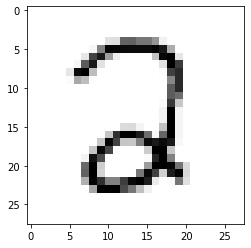

In [30]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [31]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [32]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [33]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [34]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [35]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [36]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [37]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [45]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [50]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [51]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [52]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [53]:
learner1.train_loop(dl)

Epoch 0 Loss 0.21587375645147028
train accuracy is: 0.8014521782674011, test accuracy is 0.8119959677419355
Epoch 10 Loss 0.0641355938444957
train accuracy is: 0.9369888165581706, test accuracy is 0.9465725806451613
Epoch 20 Loss 0.043680777271245905
train accuracy is: 0.9548489400767819, test accuracy is 0.9637096774193549
Epoch 30 Loss 0.03634810925978096
train accuracy is: 0.9609414121181773, test accuracy is 0.9642137096774194
Epoch 40 Loss 0.03238566753706255
train accuracy is: 0.9641962944416625, test accuracy is 0.9672379032258065
Epoch 50 Loss 0.02980347065925132
train accuracy is: 0.9659489233850777, test accuracy is 0.96875
Epoch 60 Loss 0.027917909176434906
train accuracy is: 0.9687030545818728, test accuracy is 0.9707661290322581
Epoch 70 Loss 0.02645882241114433
train accuracy is: 0.970288766483058, test accuracy is 0.9707661290322581
Epoch 80 Loss 0.025264485547163568
train accuracy is: 0.9711233516942079, test accuracy is 0.9712701612903226
Epoch 90 Loss 0.02425724018883

0.0029814417704133035

##### Now running only the logistic regression based classification to compare results with NN

In [54]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [55]:
learner2.train_loop(dl)

Epoch 0 Loss 0.23310067118288552
train accuracy is: 0.7071440494074445, test accuracy is 0.6844758064516129
Epoch 10 Loss 0.10301889604331908
train accuracy is: 0.9059422467033884, test accuracy is 0.9138104838709677
Epoch 20 Loss 0.07934076305054875
train accuracy is: 0.9272241695877149, test accuracy is 0.9334677419354839
Epoch 30 Loss 0.06839336345290317
train accuracy is: 0.9354031046569855, test accuracy is 0.9415322580645161
Epoch 40 Loss 0.061808383017500225
train accuracy is: 0.9399933233183108, test accuracy is 0.9450604838709677
Epoch 50 Loss 0.05731925785087446
train accuracy is: 0.943248205641796, test accuracy is 0.9501008064516129
Epoch 60 Loss 0.054019398704461985
train accuracy is: 0.9460023368385913, test accuracy is 0.9556451612903226
Epoch 70 Loss 0.051466757594799545
train accuracy is: 0.9480053413453514, test accuracy is 0.9571572580645161
Epoch 80 Loss 0.04941845455891547
train accuracy is: 0.9502587214154565, test accuracy is 0.9591733870967742
Epoch 90 Loss 0.04

0.02195694733756507

### Comparing results of NN and LR

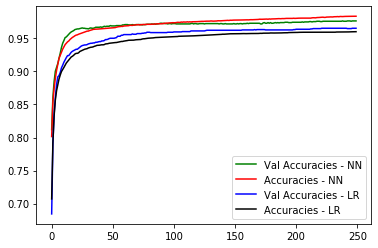

In [63]:
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - LR")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - LR")
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR